<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW_7_Problem_1_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time

In [ ]:
# Load and preprocess CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Build the Convolutional Neural Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=300, validation_data=(test_images, test_labels))

Epoch 1/300
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5166 - accuracy: 0.4491 - val_loss: 1.2416 - val_accuracy: 0.5451
Epoch 2/300
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1647 - accuracy: 0.5864 - val_loss: 1.1532 - val_accuracy: 0.5853
Epoch 3/300
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0151 - accuracy: 0.6434 - val_loss: 0.9991 - val_accuracy: 0.6453
Epoch 4/300
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9234 - accuracy: 0.6773 - val_loss: 0.9204 - val_accuracy: 0.6781
Epoch 5/300
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8584 - accuracy: 0.6993 - val_loss: 0.9265 - val_accuracy: 0.6752
Epoch 6/300
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8032 - accuracy: 0.7163 - val_loss: 0.9338 - val_accuracy: 0.6731
Epoch 7/300
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7550 - accuracy: 0.7338 - val_loss: 0

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 8.1886 - accuracy: 0.6672


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Predict on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Report results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"F1 Score: {f1}")


313/313 [==============================] - 6s 19ms/step
Accuracy: 0.6672
Confusion Matrix:
[[738  28  46  19  22   9   7  13  86  32]
 [ 26 771   8   9   7   3  12   8  38 118]
 [ 95   7 528  80  86  76  58  33  25  12]
 [ 33  13  85 507  58 172  47  36  25  24]
 [ 30   4  89  75 615  57  29  75  21   5]
 [ 19   3  71 205  52 551  20  47  18  14]
 [ 14  10  62  98  66  30 690   9  17   4]
 [ 26   4  49  62  69  76   0 689  13  12]
 [ 73  26  17  19   6  10   5   5 804  35]
 [ 42  77   8  19   3   9   4  13  46 779]]
F1 Score: 0.6678922650570065


In [ ]:
end_time = time.time()
# Report results
print(f"Training Time: {end_time - start_time} seconds")
print(f"Training Loss after 300 epochs: {history.history['loss'][-1]}")
print(f"Evaluation Accuracy after 300 epochs: {test_acc}")

Training Time: 22494.495398044586 seconds
Training Loss after 300 epochs: 0.06881383061408997
Evaluation Accuracy after 300 epochs: 0.6672000288963318


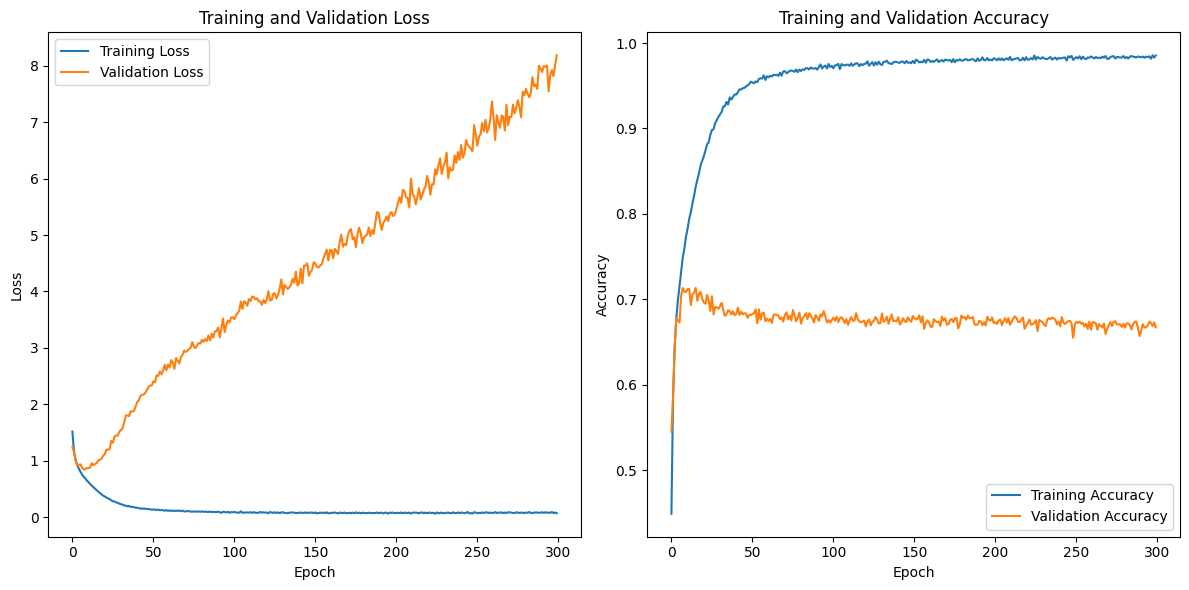

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0